# How to Aggregate and Plot AmpTools .fit Results
You now have a whole bunch of fit results, stored as `.fit` files, that you need to start plotting. Within this tutorial you will learn how to:
1. Aggregate these fit and data files into flattened `.csv` files
2. Load and plot the `.csv` fit results using python's pandas and matplotlib libraries   

## Environment
1. At the top right of the notebook your language / kernel is listed. Make sure `.venv (Python 3.9.18)` is selected. If the option does not appear, make sure to the virtual environment is active (see [**section 1.2** in the README](../README.md) for details).
    * If you can't find it, you may need to run the command `python -m ipykernel install --prefix=/path/to/alternative/location --name=.venv --display-name "Python (.venv)"`
2. Next we want to ensure that our GlueX environment is setup. Normally we could simply run `source setup_gluex.csh` if we were doing this in the terminal, but we'll need to go about it a special way to run this in the jupyter notebook:

In [1]:
from pathlib import Path
import os
import subprocess

# first lets define the parent dir (this session)
PARENT_DIR = Path.cwd().resolve().parent
print(PARENT_DIR)

# We'll also need to set the data directory
DATA_DIR = "/work/halld/gluex_workshop_data/tutorial_2025/session2e"

import sys
sys.path.insert(0, PARENT_DIR) # add the session directory to the list of directories Python uses to look for modules

# run the source script (done here in csh, but bash could be done instead)
command = f"source {PARENT_DIR}/../setup_gluex.csh && env"
proc = subprocess.Popen(command, stdout=subprocess.PIPE, shell=True, executable='/bin/csh')
output, _ = proc.communicate()

# Parse the environment variables
env_vars = {}
for line in output.decode().splitlines():
    key, value = line.split('=', 1)
    env_vars[key] = value

# add the environment variables
os.environ.update(env_vars)

/w/halld-scshelf2101/kscheuer/gluex_workshops/tutorial_2025/session2e


## File Aggregation
We will want to create the following 2 files in preparation for our analysis:
1. `data.csv`: constructed from the `.root` data files in each mass bin, containing the information for that bin
2. `best_fits.csv`: contains all the fit results across the entire mass range, made from the "best" of all the randomized fits in each bin

### Data
If we want to plot our fit results, we need to include the original data we are actually fitting to. This information is unfortunately not included in the `.fit` files, so we need to read it into a `data.csv` file using [convert_to_csv.py](../scripts/convert_to_csv.py). These python scripts use `argparse`, so we can conveniently see its abilities through its help message

In [2]:
%run -i $PARENT_DIR/scripts/convert_to_csv.py -h

usage: convert_to_csv.py [-h] [-i INPUT [INPUT ...]] [-o OUTPUT] [-s SORTED]
                         [--sort-index SORT_INDEX] [-a] [-m MASS_BRANCH]
                         [--correlation CORRELATION] [--covariance COVARIANCE]
                         [-f] [-nt TREE_NAME] [-mi MESON_INDEX] [-p] [-v]

This script converts AmpTools .fit file(s) or its associated ROOT files into a
csv. This script is used for two fit result purposes: 1. To aggregate the
AmpTools .fit files into a single .csv file for easier analysis. 2. To convert
the ROOT files that the .fit files are based off of into a .csv file. Behind
the scenes, this script calls a ROOT macro for either situation.

optional arguments:
  -h, --help            show this help message and exit
  -i INPUT [INPUT ...], --input INPUT [INPUT ...]
                        Input file(s). Also accepts path(s) with a wildcard
                        '*' and finds all matching files. Can also accept a
                        file containing a l

Great, now lets see what (sorted) files we are going to combine, and run the script

In [3]:
%run -i $PARENT_DIR/scripts/convert_to_csv.py -i $DATA_DIR/mass*/*Amplitude.root -p
%run -i $PARENT_DIR/scripts/convert_to_csv.py -i $DATA_DIR/mass*/*Amplitude.root

Checking if all input files exist...
Files that will be processed:
	/work/halld/gluex_workshop_data/tutorial_2025/session2e/mass_1.100-1.125/anglesOmegaPiAmplitude.root
	/work/halld/gluex_workshop_data/tutorial_2025/session2e/mass_1.125-1.150/anglesOmegaPiAmplitude.root
	/work/halld/gluex_workshop_data/tutorial_2025/session2e/mass_1.150-1.175/anglesOmegaPiAmplitude.root
	/work/halld/gluex_workshop_data/tutorial_2025/session2e/mass_1.175-1.200/anglesOmegaPiAmplitude.root
	/work/halld/gluex_workshop_data/tutorial_2025/session2e/mass_1.200-1.225/anglesOmegaPiAmplitude.root
	/work/halld/gluex_workshop_data/tutorial_2025/session2e/mass_1.225-1.250/anglesOmegaPiAmplitude.root
	/work/halld/gluex_workshop_data/tutorial_2025/session2e/mass_1.250-1.275/anglesOmegaPiAmplitude.root
	/work/halld/gluex_workshop_data/tutorial_2025/session2e/mass_1.275-1.300/anglesOmegaPiAmplitude.root
Checking if all input files exist...
Temp file created at /scratch/kscheuer/tmpik202x58
Running ROOT macro with comma

You should now see a `data.csv` file here in the [analysis directory](./)

### Fit Results
Now we will be combining all our `.fit` results across the mass bins into a flattened `.csv` file to prepare them for analysis via python. This is achieved again through the [convert_to_csv.py](../scripts/convert_to_csv.py) script, which behind the scenes interacts with [extract_fit_results.cc](../scripts/extract_fit_results.cc) to load the AmpTools `FitResults` class and import the information we need.

In [4]:
%run -i $PARENT_DIR/scripts/convert_to_csv.py -i $DATA_DIR/mass*/omegapi.fit -o best_fits.csv

Checking if all input files exist...
Temp file created at /scratch/kscheuer/tmp52agjteo
Running ROOT macro with command: ['root', '-n', '-l', '-b', '-q', 'loadAmpTools.C', '/w/halld-scshelf2101/kscheuer/gluex_workshops/tutorial_2025/session2e/scripts/extract_fit_results.cc("/scratch/kscheuer/tmp52agjteo", "best_fits.csv", 0)', '/w/halld-scshelf2101/kscheuer/gluex_workshops/tutorial_2025/session2e/scripts/extract_corr_matrix.cc("/scratch/kscheuer/tmp52agjteo", "best_fits_corr.csv")', '/w/halld-scshelf2101/kscheuer/gluex_workshops/tutorial_2025/session2e/scripts/extract_cov_matrix.cc("/scratch/kscheuer/tmp52agjteo", "best_fits_cov.csv")']
ROOT macro completed successfully


Alongside the fit result `best_fits.csv` you'll also find 2 other csvs which contain the full covariance and correlation matrix of each fit result

## Preprocessing
To ensure that our data is ready for analysis, lets load in our files using pandas dataframes and check them for any potential issues. First, we can simply print out the heads (first 5 rows) to get a sense of the structure. Note if you are working on VS Code and installed the suggested [DataWrangler extension](https://marketplace.visualstudio.com/items?itemName=ms-toolsai.datawrangler), then you can open these dataframes directly from this notebook for easy viewing

In [5]:
import pandas as pd

# load files
df_fit = pd.read_csv("best_fits.csv")
df_data = pd.read_csv("data.csv")

df_fit.head()

file  detected_events  \
0  /work/halld/gluex_workshop_data/tutorial_2025/...          1608.94   
1  /work/halld/gluex_workshop_data/tutorial_2025/...          1956.14   
2  /work/halld/gluex_workshop_data/tutorial_2025/...          2403.62   
3  /work/halld/gluex_workshop_data/tutorial_2025/...          2897.34   
4  /work/halld/gluex_workshop_data/tutorial_2025/...          3048.60   

   detected_events_err  eMatrixStatus  generated_events  generated_events_err  \
0              40.1112              3           23438.9               603.845   
1              42.2305              3           27614.5               607.666   
2              47.0487              3           33463.3               682.033   
3              49.9787              3           44084.6               777.453   
4              50.1651              3           43551.9               743.289   

   lastMinuitCommandStatus  likelihood  m1m0P_re  m1m0P_im  ...  p1ppD_p1mpP  \
0                        0    -970.155  -67.4830  24.60150  ...    -0.023941   
1                        0    -989.315  -54.1820  -7.41629  ...    -2.301570   
2                        0   -1192.580   16.0767 -43.76350  ...    -1.611340   
3                        0   -2525.840  101.9440  15.18330  ...    -2.382900   
4                        0   -2168.900   67.8654  -3.97069  ...     1.591940   

   p1ppD_p1mpP_err  p1ppS_p1m0P  p1ppS_p1m0P_err  p1ppS_p1mmP  \
0         0.663015      4.02357         0.431579     2.230620   
1         0.251851      1.15932         0.490392    -1.397850   
2         0.172793      2.13880         1.728970     1.763150   
3         0.294729     -4.11605         0.322565     0.275002   
4         0.218473      2.77714         0.223716    -0.793961   

   p1ppS_p1mmP_err  p1ppS_p1mpP  p1ppS_p1mpP_err  p1ppS_p1ppD  p1ppS_p1ppD_err  
0         0.330751      2.98629         0.271506     3.010230         0.721483  
1         0.173647     -2.41032         0.244005    -0.108748         0.247783  
2         0.538221      2.58574         0.205302     4.197080         0.208225  
3         0.249755     -3.41809         0.273067    -1.035200         0.181749  
4         0.230448      2.80880         0.236254     1.216860         0.235157  

[5 rows x 278 columns]

In [6]:
df_data.head()

file  t_low  t_high  t_center  \
0  /work/halld/gluex_workshop_data/tutorial_2025/...   0.09    0.60     0.345   
1  /work/halld/gluex_workshop_data/tutorial_2025/...   0.09    0.60     0.345   
2  /work/halld/gluex_workshop_data/tutorial_2025/...   0.09    0.61     0.350   
3  /work/halld/gluex_workshop_data/tutorial_2025/...   0.09    0.60     0.345   
4  /work/halld/gluex_workshop_data/tutorial_2025/...   0.09    0.61     0.350   

      t_avg     t_rms  e_low  e_high  e_center    e_avg     e_rms  m_low  \
0  0.234261  0.116344   8.21     8.8     8.505  8.51752  0.168249  1.100   
1  0.243228  0.113989   8.21     8.8     8.505  8.52012  0.173668  1.125   
2  0.239690  0.114504   8.21     8.8     8.505  8.51149  0.171992  1.150   
3  0.253521  0.120039   8.21     8.8     8.505  8.50948  0.169743  1.175   
4  0.253623  0.119434   8.21     8.8     8.505  8.50551  0.170204  1.200   

   m_high  m_center    m_avg     m_rms   events  events_err  
0   1.125    1.1125  1.11293  0.007282  1608.91     50.5994  
1   1.150    1.1375  1.13804  0.007269  1956.12     55.0108  
2   1.175    1.1625  1.16283  0.007219  2403.66     60.8963  
3   1.200    1.1875  1.18795  0.007171  2897.34     66.1894  
4   1.225    1.2125  1.21257  0.007243  3048.62     67.8504

Lets check that we have the same number of data files and fit files, and for any missing / NaN values:   

In [7]:
print(df_fit.shape[0] == df_data.shape[0])
print(f"Number of null values in the fit results: {df_fit.isnull().sum().sum()}")
print(f"Number of null values in the data: {df_data.isnull().sum().sum()}")

True
Number of null values in the fit results: 0
Number of null values in the data: 0


Finally we'll want to wrap our phase differences to all be within a $2\pi$ range, and converted from radians to degrees $(^\circ)$. Lets wrap them within $(-\pi,\pi]$ using our helper functions in [utils](./utils.py).

In [8]:
import utils
utils.wrap_phases(df_fit)

## Analysis
With our data prepared, lets move on to analysis. To avoid having to edit these settings for every single figure, lets change the global defaults

In [9]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update({
    'figure.figsize': (10, 8),
    'figure.dpi': 100,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'axes.labelsize': 16,
    'legend.fontsize': 16,
    'xtick.major.width': 2.0,
    'ytick.major.width': 2.0,
    'xtick.minor.width': 1.8,
    'ytick.minor.width': 1.8,
    'lines.markersize': 10,
    'grid.alpha': 0.8,
    'axes.grid': True
})
plt.minorticks_on()
plt.close() # suppress outputting an empty plot

We'll also define a few common parameters to all plots, and print out what coherent sums and phase differences we have available to us

In [10]:
mass_bins = df_data["m_center"]
bin_width = (df_data["m_high"] - df_data["m_low"])[0] # all bin widths are equal, so just use the first one
coherent_sums = utils.get_coherent_sums(df_fit)
phase_differences = utils.get_phase_differences(df_fit)

for sum_type, sum_list in coherent_sums.items():
    print(f"{sum_type} -> {sum_list}")
for amp_pair, phase_column in phase_differences.items():
    print(f"{amp_pair} -> {phase_column}")

eJPmL -> ['m1m0P', 'm1mmP', 'm1mpP', 'm1p0D', 'm1p0S', 'm1pmD', 'm1pmS', 'm1ppD', 'm1ppS', 'p1m0P', 'p1mmP', 'p1mpP', 'p1p0D', 'p1p0S', 'p1pmD', 'p1pmS', 'p1ppD', 'p1ppS']
JPmL -> ['1m0P', '1mmP', '1mpP', '1p0D', '1p0S', '1pmD', '1pmS', '1ppD', '1ppS']
eJPL -> ['m1mP', 'm1pD', 'm1pS', 'p1mP', 'p1pD', 'p1pS']
JPL -> ['1mP', '1pD', '1pS']
eJP -> ['m1m', 'm1p', 'p1m', 'p1p']
JP -> ['1m', '1p']
e -> ['m', 'p']
('m1m0P', 'm1mmP') -> m1mmP_m1m0P
('m1mmP', 'm1m0P') -> m1mmP_m1m0P
('m1m0P', 'm1mpP') -> m1m0P_m1mpP
('m1mpP', 'm1m0P') -> m1m0P_m1mpP
('m1m0P', 'm1p0D') -> m1p0D_m1m0P
('m1p0D', 'm1m0P') -> m1p0D_m1m0P
('m1m0P', 'm1p0S') -> m1p0S_m1m0P
('m1p0S', 'm1m0P') -> m1p0S_m1m0P
('m1m0P', 'm1pmD') -> m1pmD_m1m0P
('m1pmD', 'm1m0P') -> m1pmD_m1m0P
('m1m0P', 'm1pmS') -> m1pmS_m1m0P
('m1pmS', 'm1m0P') -> m1pmS_m1m0P
('m1m0P', 'm1ppD') -> m1ppD_m1m0P
('m1ppD', 'm1m0P') -> m1ppD_m1m0P
('m1m0P', 'm1ppS') -> m1ppS_m1m0P
('m1ppS', 'm1m0P') -> m1ppS_m1m0P
('m1mmP', 'm1mpP') -> m1mmP_m1mpP
('m1mpP', 'm

### Mass independent fit results
One of the simplest plots to make is of the data we fit to with the fit result's intensity in bins of mass, with the fit result decomposed into the coherent sum of our $J^P$ values. In this case we only have a $b_1$ contribution, and so only $1^+$ contributes

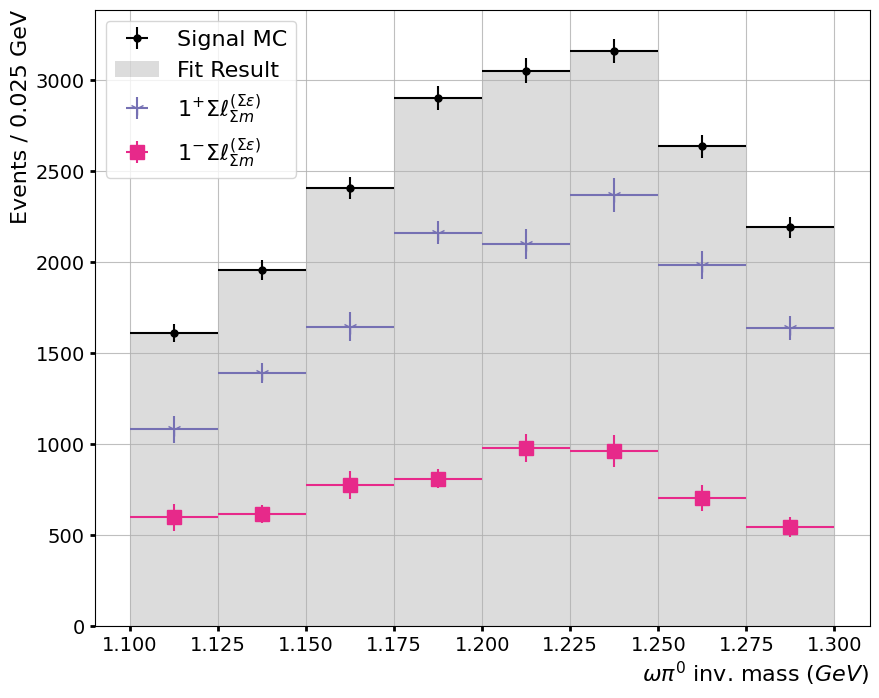

In [12]:
# I prefer this colormap over the default
jp_colors = matplotlib.colormaps["Dark2"].colors

fig, ax = plt.subplots()

# plot data as black dots
ax.errorbar(
    x=mass_bins, y=df_data["events"], xerr=bin_width / 2.0 , yerr=df_data["events_err"], 
    fmt="k.",label="Signal MC",
)

# Plot Fit Result as a grey histogram with its error bars
ax.bar(
    x=mass_bins, height=df_fit["detected_events"], width=bin_width,        
    color="0.1", alpha=0.15, label="Fit Result",
)
ax.errorbar(
    x=mass_bins, y=df_fit["detected_events"], yerr=df_fit["detected_events_err"],
    fmt=",", color="0.1", alpha=0.2, markersize=0,
)

# plot 1+
ax.errorbar(
    x=mass_bins, y=df_fit["1p"], xerr=bin_width/2.0, yerr=df_fit["1p_err"], 
    label=utils.convert_amp_name("1p"), # converts amplitude / phase differences to be in J^P L_m^(e) format
    linestyle="", # want only markers, no lines\
    marker="1",
    color=jp_colors[2]
)

# plot 1-
ax.errorbar(
    x=mass_bins, y=df_fit["1m"], xerr=bin_width/2.0, yerr=df_fit["1m_err"], 
    label=utils.convert_amp_name("1m"), # converts amplitude / phase differences to be in J^P L_m^(e) format
    linestyle="", # want only markers, no lines\
    marker="s",
    color=jp_colors[3]
)

ax.set_xlabel(r"$\omega\pi^0$ inv. mass $(GeV)$", loc="right")
ax.set_ylabel(f"Events / {bin_width:.3f} GeV", loc="top")
ax.set_ylim(bottom=0.0)
ax.legend()
plt.show()

How do the individual waves perform though? Lets view them in a grid of $m$-projections and $L$ angular momenta values, where each plot shares the reflectivity contributions. The reflectivities will be colored according to the unofficial official convention for $\color{red}natural~(\varepsilon=+1)$ and $\color{blue}unnatural~(\varepsilon=-1)$ exchange

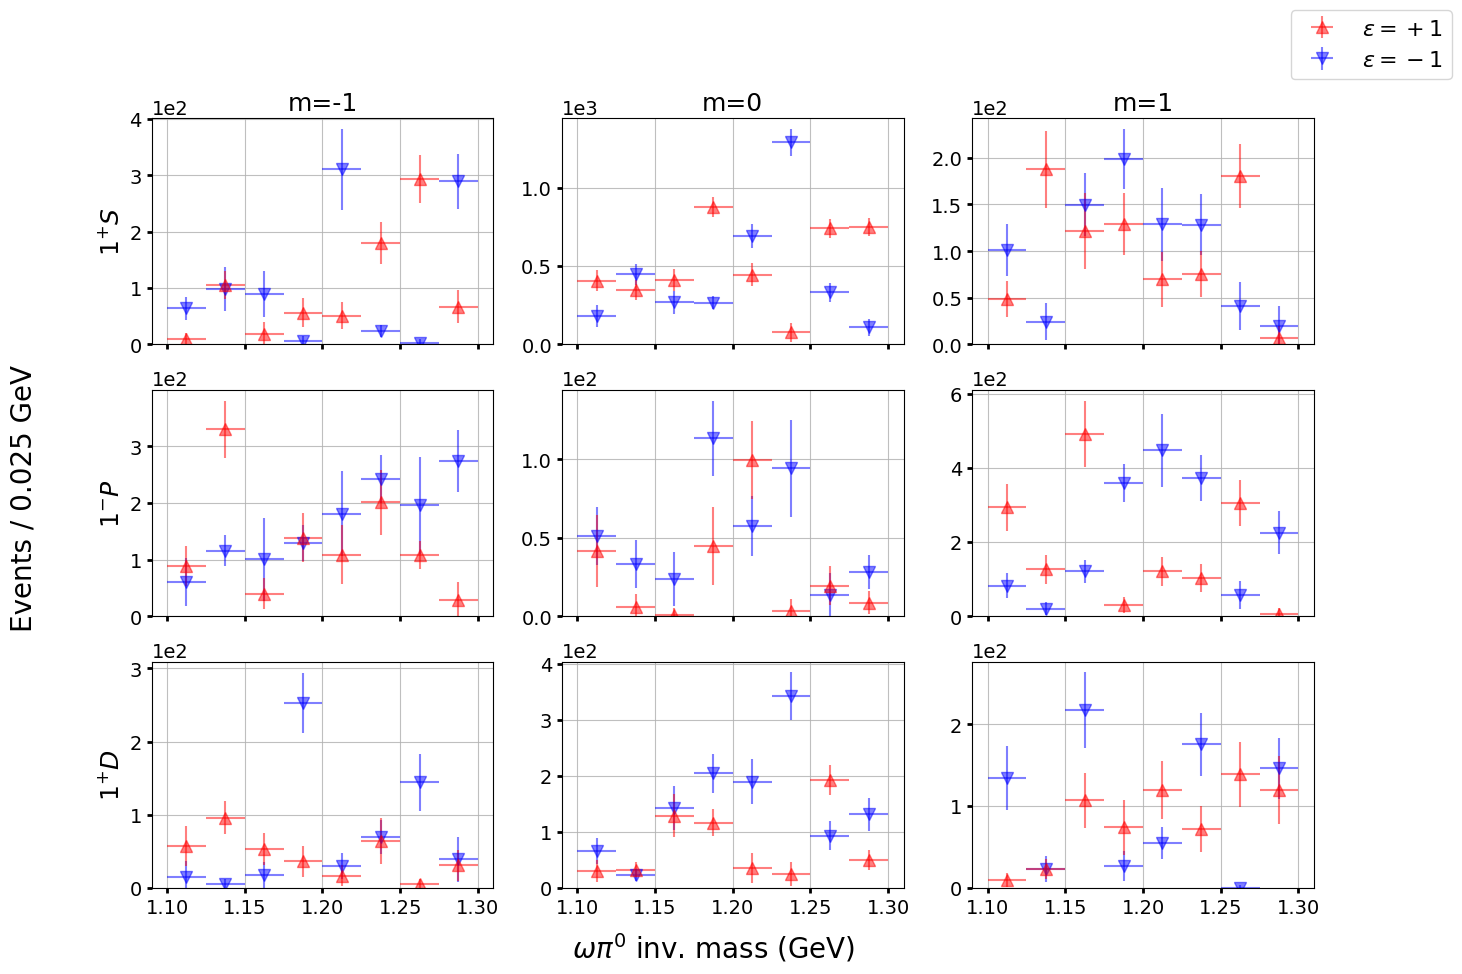

In [13]:
# define some dictionaries to convert characters <-> integers
char_to_int = {"m": -1, "0": 0, "p": +1, "S": 0, "P": 1, "D": 2}
int_to_char = {-1: "m", 0: "0", +1: "p"}
pm_dict = {"m": "-", "p": "+"}

# sort the JPL values by the order of S, P, D, F waves, and the m-projections
jpl_values = sorted(coherent_sums["JPL"], key=lambda JPL: char_to_int[JPL[-1]])
m_ints = sorted({char_to_int[JPmL[-2]] for JPmL in coherent_sums["JPmL"]})

fig, axs = plt.subplots(
    nrows=len(jpl_values),
    ncols=len(m_ints),
    sharex=True,    
    #sharey=True, # uncomment to compare relative intensities
    figsize=(15, 10),
)

# iterate through JPL (sorted like S, P, D, F wave) and sorted m-projections
for row, jpl in enumerate(jpl_values):
    for col, m in enumerate(m_ints):

        # force sci notation so large ticklabels don't overlap with neighboring plots
        axs[row,col].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
        
        # recombine jpl and m to get string needed to access the column
        JPmL = f"{jpl[0:2]}{int_to_char[m]}{jpl[-1]}"

        # set the labels for the first rows and columns
        if row == 0:
            axs[row, col].set_title(f"m={m}", fontsize=18)
        if col == 0:
            J = JPmL[0]
            P = pm_dict[JPmL[1]]
            L = JPmL[-1]
            axs[row, col].set_ylabel(rf"${J}^{{{P}}}{L}$", fontsize=18)

        # plot the negative reflectivity contribution        
        neg_plot = axs[row, col].errorbar(
            x=mass_bins, y=df_fit[f"m{JPmL}"], xerr=bin_width/2.0, yerr=df_fit[f"m{JPmL}_err"],
            marker="v", linestyle="", markersize=8,
            color="blue", 
            alpha=0.5, # prevent overlap from cluttering the view
            label=r"$\varepsilon=-1$",
        )
        # plot the positive reflectivity contribution
        pos_plot = axs[row, col].errorbar(
            x=mass_bins, y=df_fit[f"p{JPmL}"], xerr=bin_width/2.0, yerr=df_fit[f"p{JPmL}_err"],
            marker="^", linestyle="", markersize=8,
            color="red",
            alpha=0.5,
            label=r"$\varepsilon=+1$",
        )

# reset limits to 0 for all plots
for ax in axs.reshape(-1):
    ax.set_ylim(bottom=0)

# figure cosmetics
fig.text(0.5, 0.04, r"$\omega\pi^0$ inv. mass (GeV)", ha="center", fontsize=20)
fig.text(
    0.04, 0.5, f"Events / {bin_width:.3f} GeV", 
    ha="center", va="center", 
    rotation="vertical", rotation_mode="anchor", fontsize=20,
)

# the pos/neg_plot variables get overwritten in the loop, so we're only passing one set of handles to the figure,
# which is okay since all plots have the same legend. If we didn't do this, every single plots redundant legend would be displayed
fig.legend(handles=[pos_plot, neg_plot], loc="upper right") # 
plt.show()
pass

What about the phase differences? Lets take a look at our two dominant amplitudes from separate $J^P$ values and plot their corresponding phase difference together

In [ ]:
import numpy as np

fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw={"wspace": 0.0, "hspace": 0.07}, height_ratios=[3, 1])

amp1, amp2 = "p1p0S", "p1mpP"

# plot the first amplitude
axs[0].errorbar(
    x=mass_bins, y=df_fit[amp1], xerr=bin_width/2.0, yerr=df_fit[f"{amp1}_err"],
    marker="o", linestyle="", color="green",
    label=utils.convert_amp_name(amp1),
)
# plot the second amplitude
axs[0].errorbar(
    x=mass_bins, y=df_fit[amp2], xerr=bin_width/2.0, yerr=df_fit[f"{amp2}_err"],
    marker="s", linestyle="", color="purple",
    label=utils.convert_amp_name(amp2),
)

# plot the phase difference. Since there is an inherent ambiguity in the sign of the phase difference within
# the model, we need to plot both signs to accommodate for every possible phase motion
phase_dif = phase_differences[(amp1, amp2)]
axs[1].errorbar(
    x=mass_bins, y=df_fit[phase_dif], xerr=bin_width/2.0, yerr=df_fit[f"{phase_dif}_err"].abs(), 
    marker=".", linestyle="", color="black"
)
axs[1].errorbar(
    x=mass_bins, y=-df_fit[phase_dif], xerr=bin_width/2.0, yerr=df_fit[f"{phase_dif}_err"].abs(), 
    marker=".", linestyle="", color="black"
)

# cosmetics
axs[0].set_ylim(bottom=0.0)
axs[0].set_ylabel(f"Events / {bin_width:.3f} GeV", loc="top")

axs[1].set_yticks(np.linspace(-180, 180, 5))  # force to be in pi intervals
axs[1].set_ylim([-180, 180])
axs[1].set_ylabel(r"Phase Diff. ($^{\circ}$)", loc="center")
axs[1].set_xlabel(r"$\omega\pi^0$ inv. mass $(GeV)$", loc="right")

axs[0].legend(loc="upper left")

plt.show()

### Correlation Matrix
To see how correlated our amplitude real/imaginary parts are, lets load in the matrix for each file and view the matrix as a heatmap

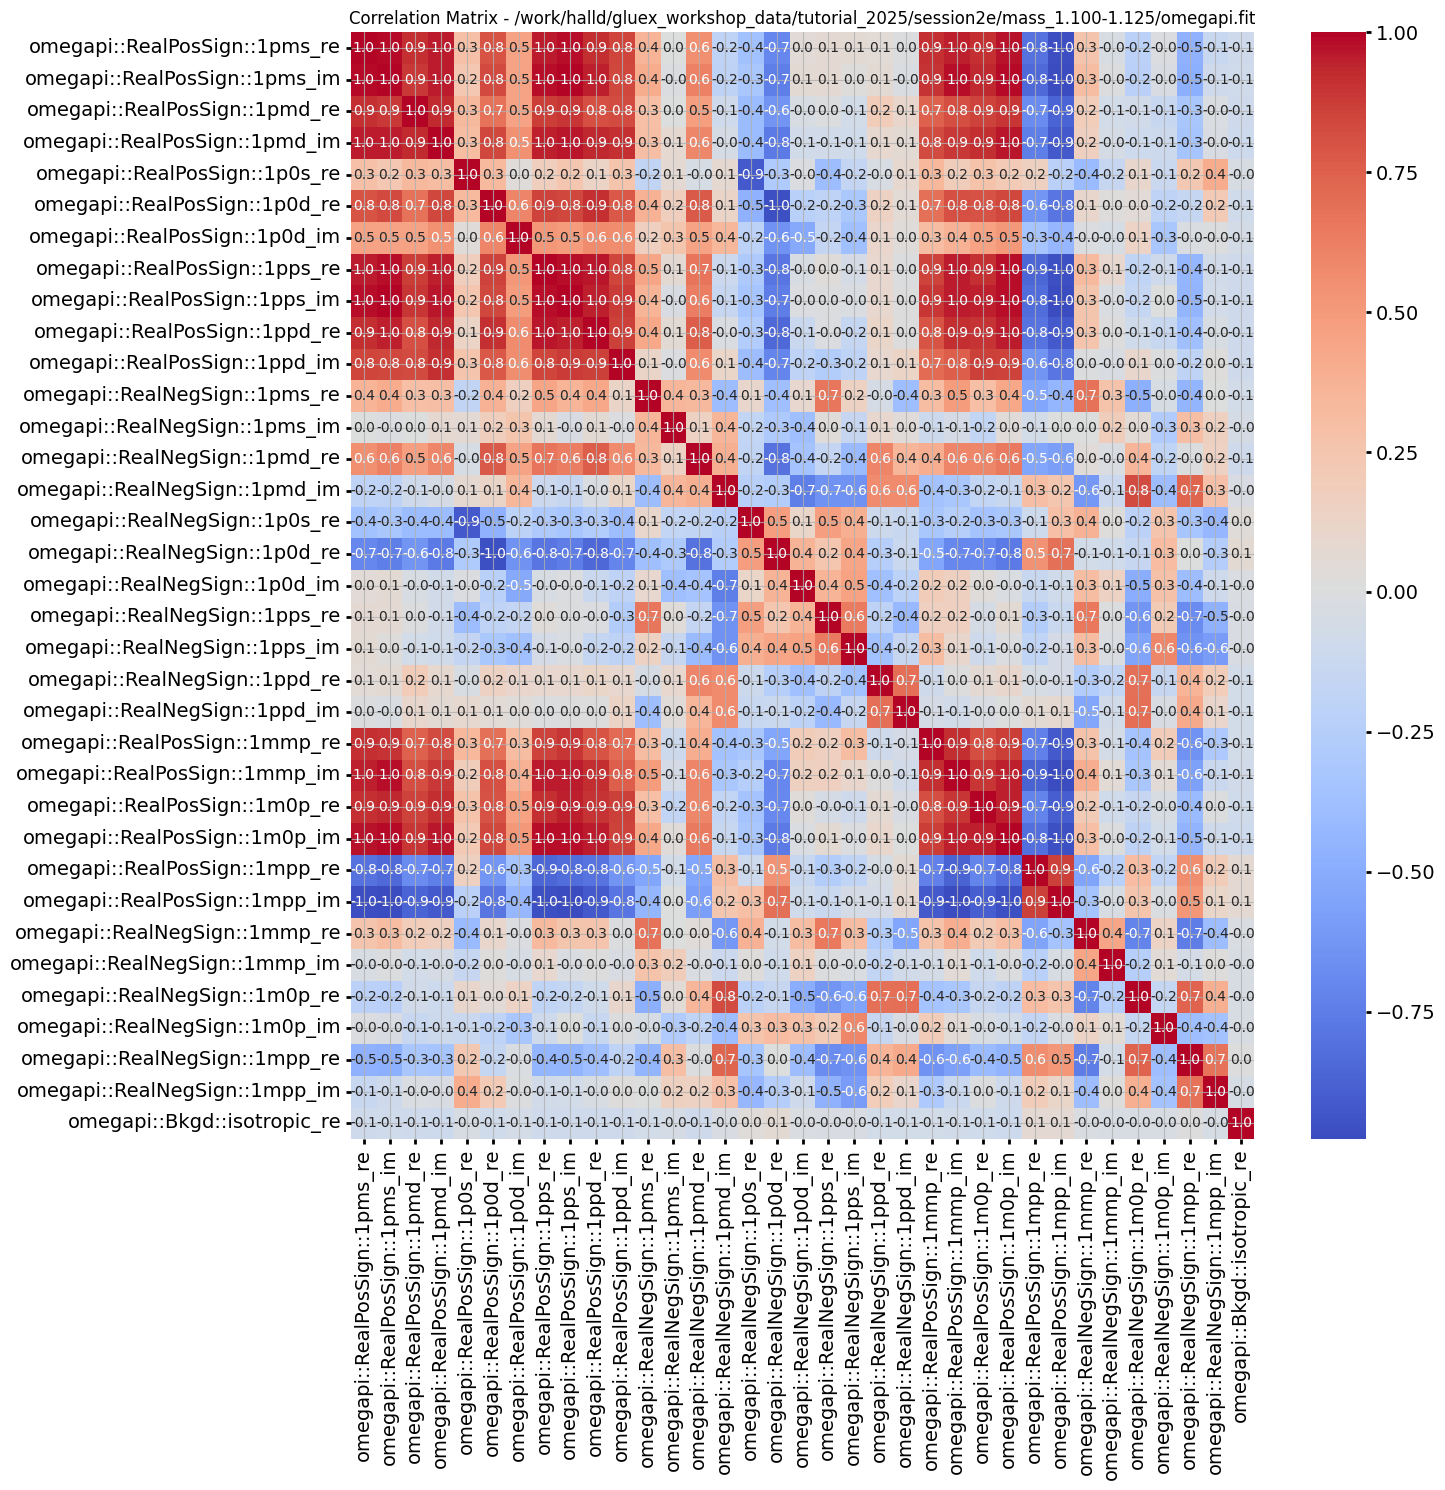

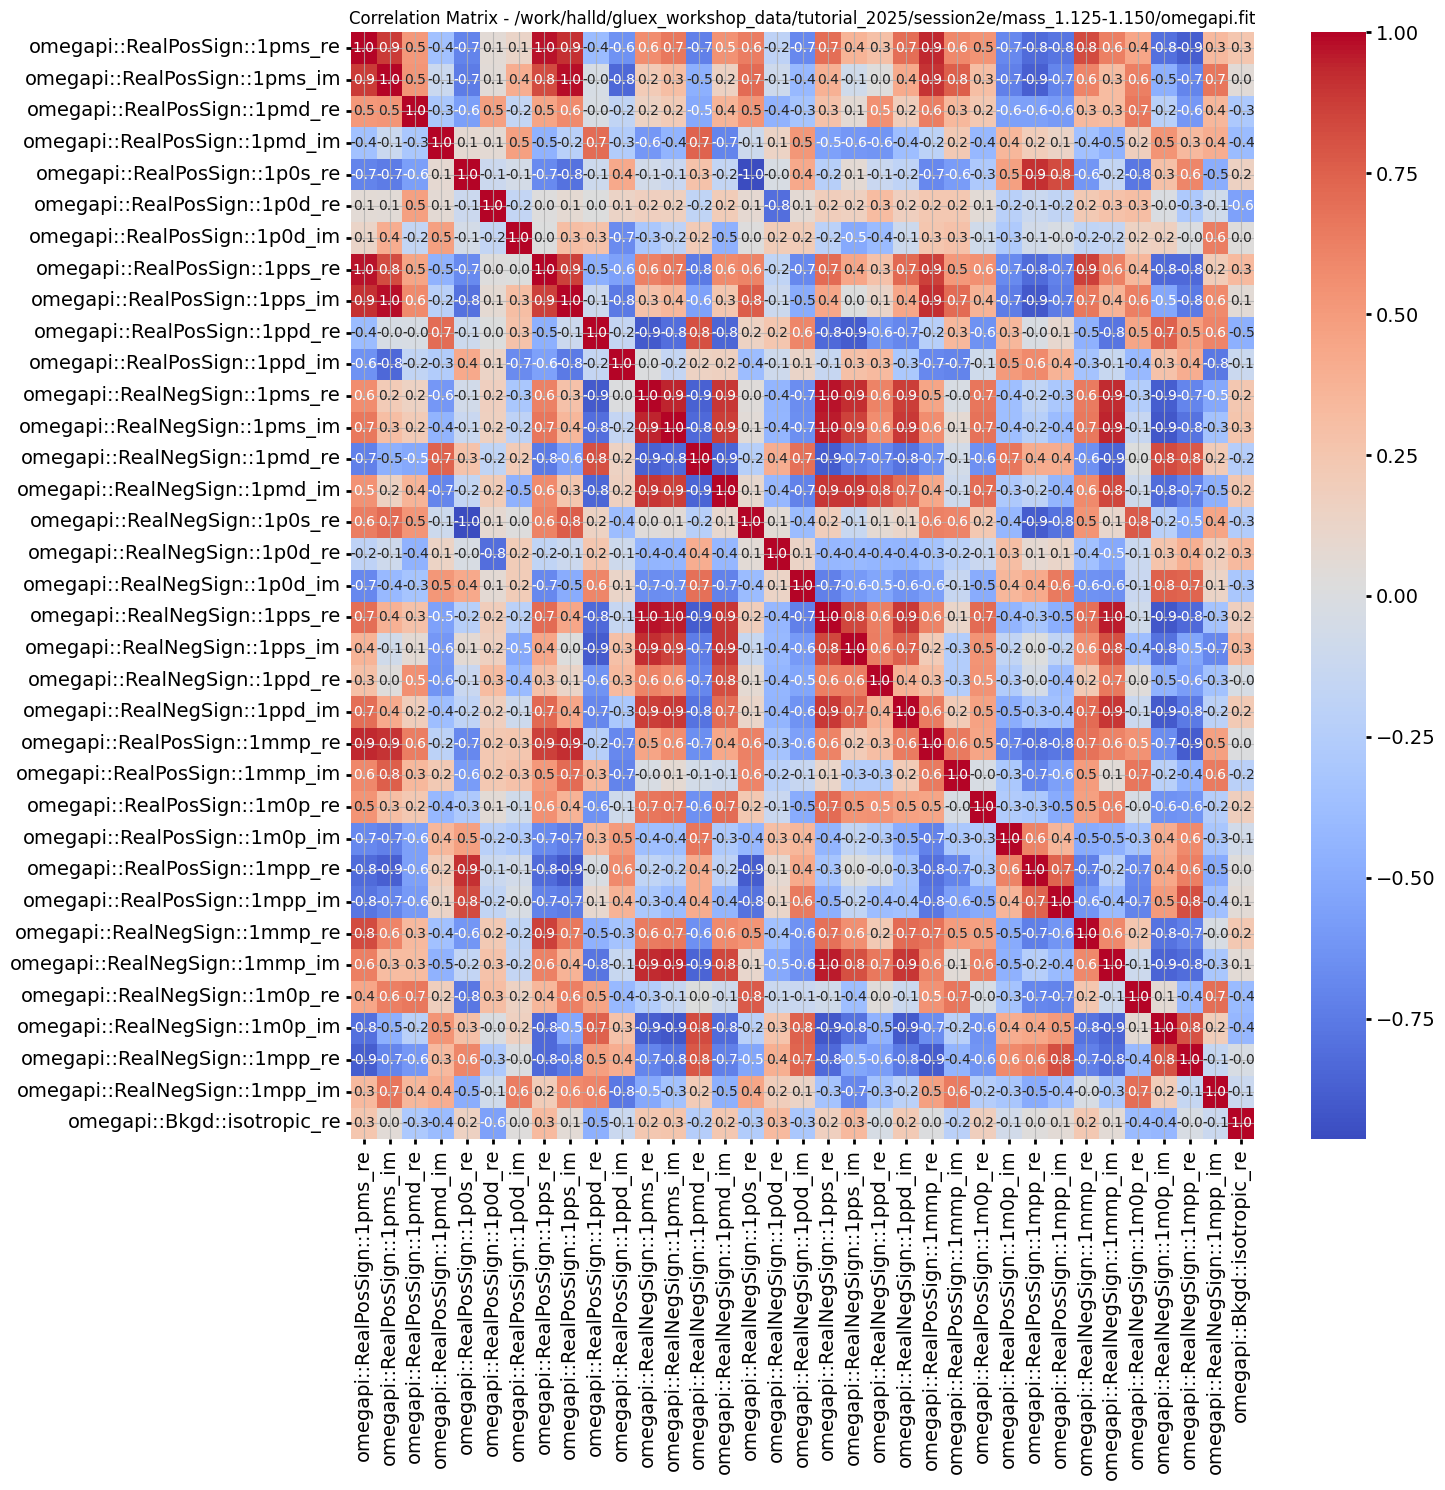

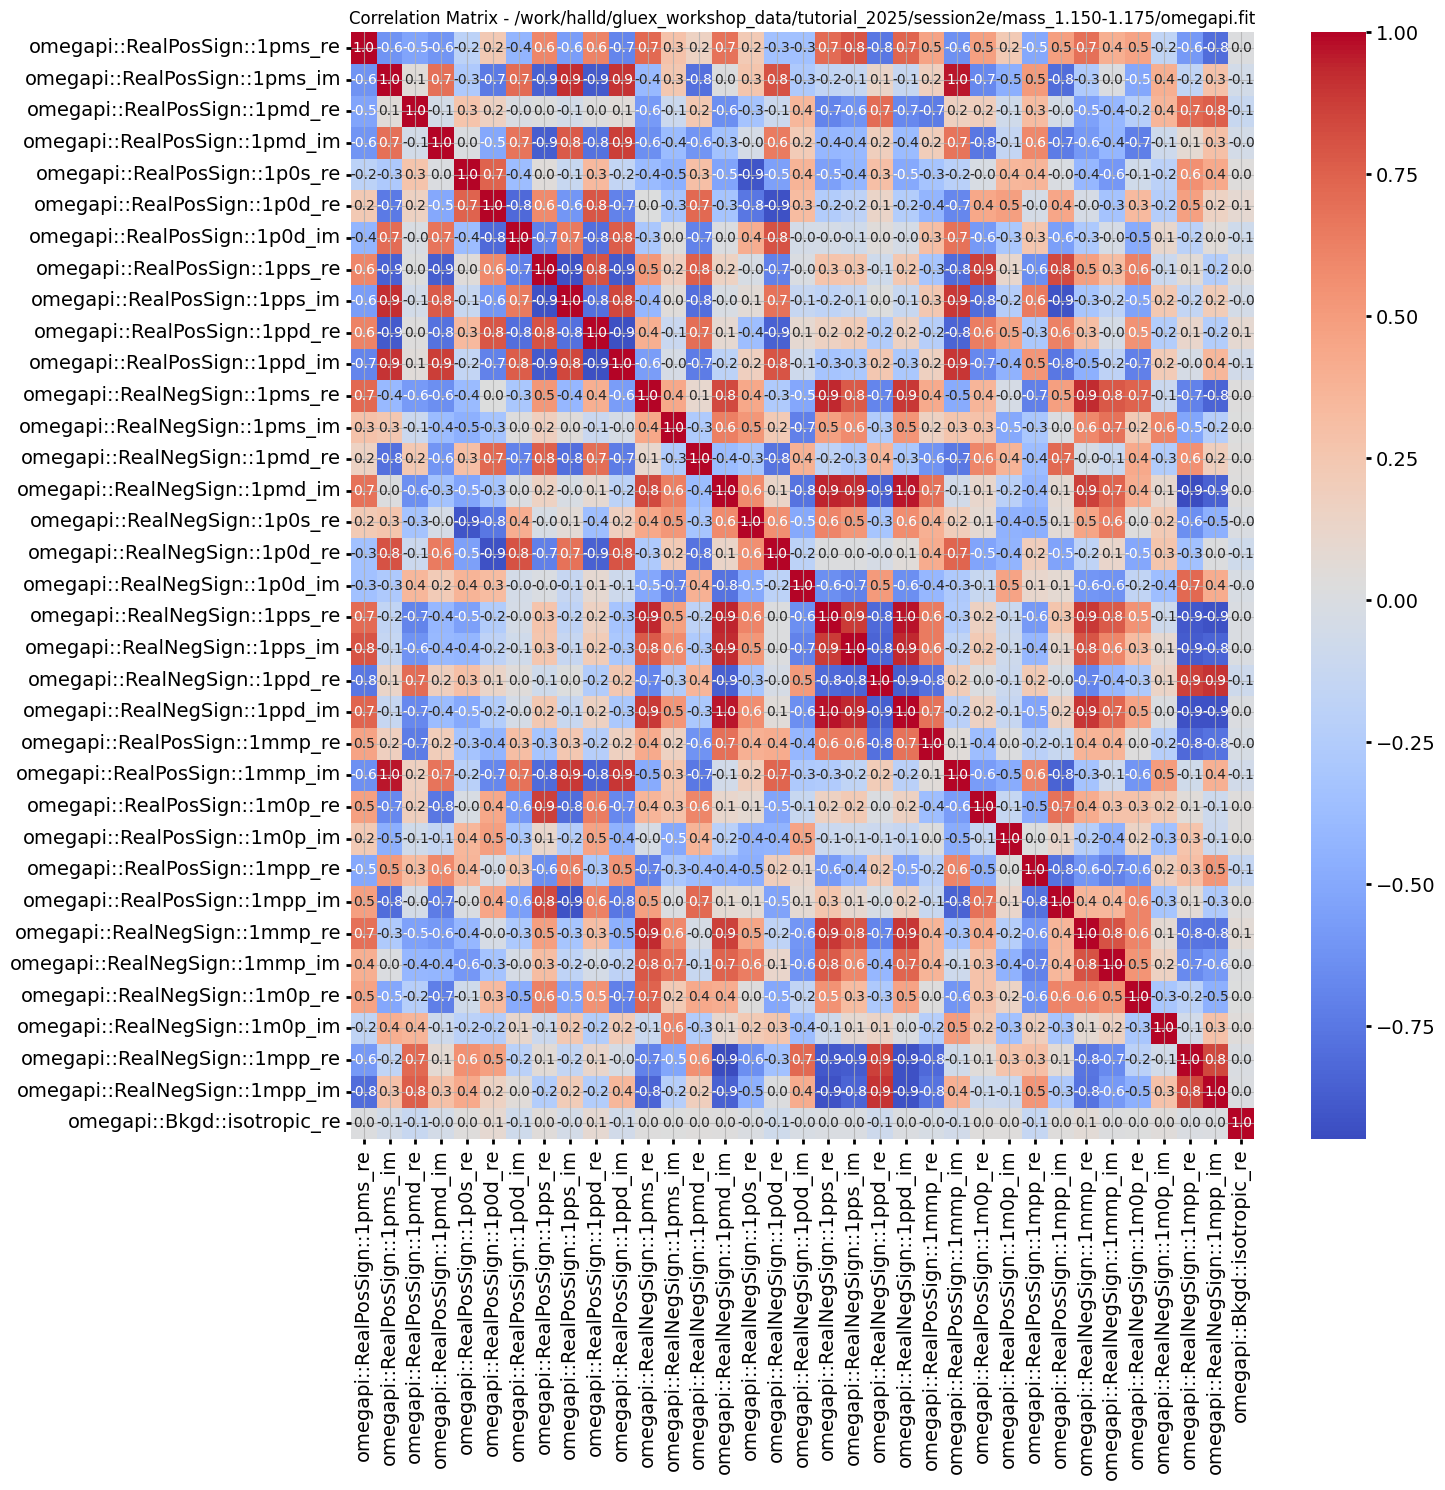

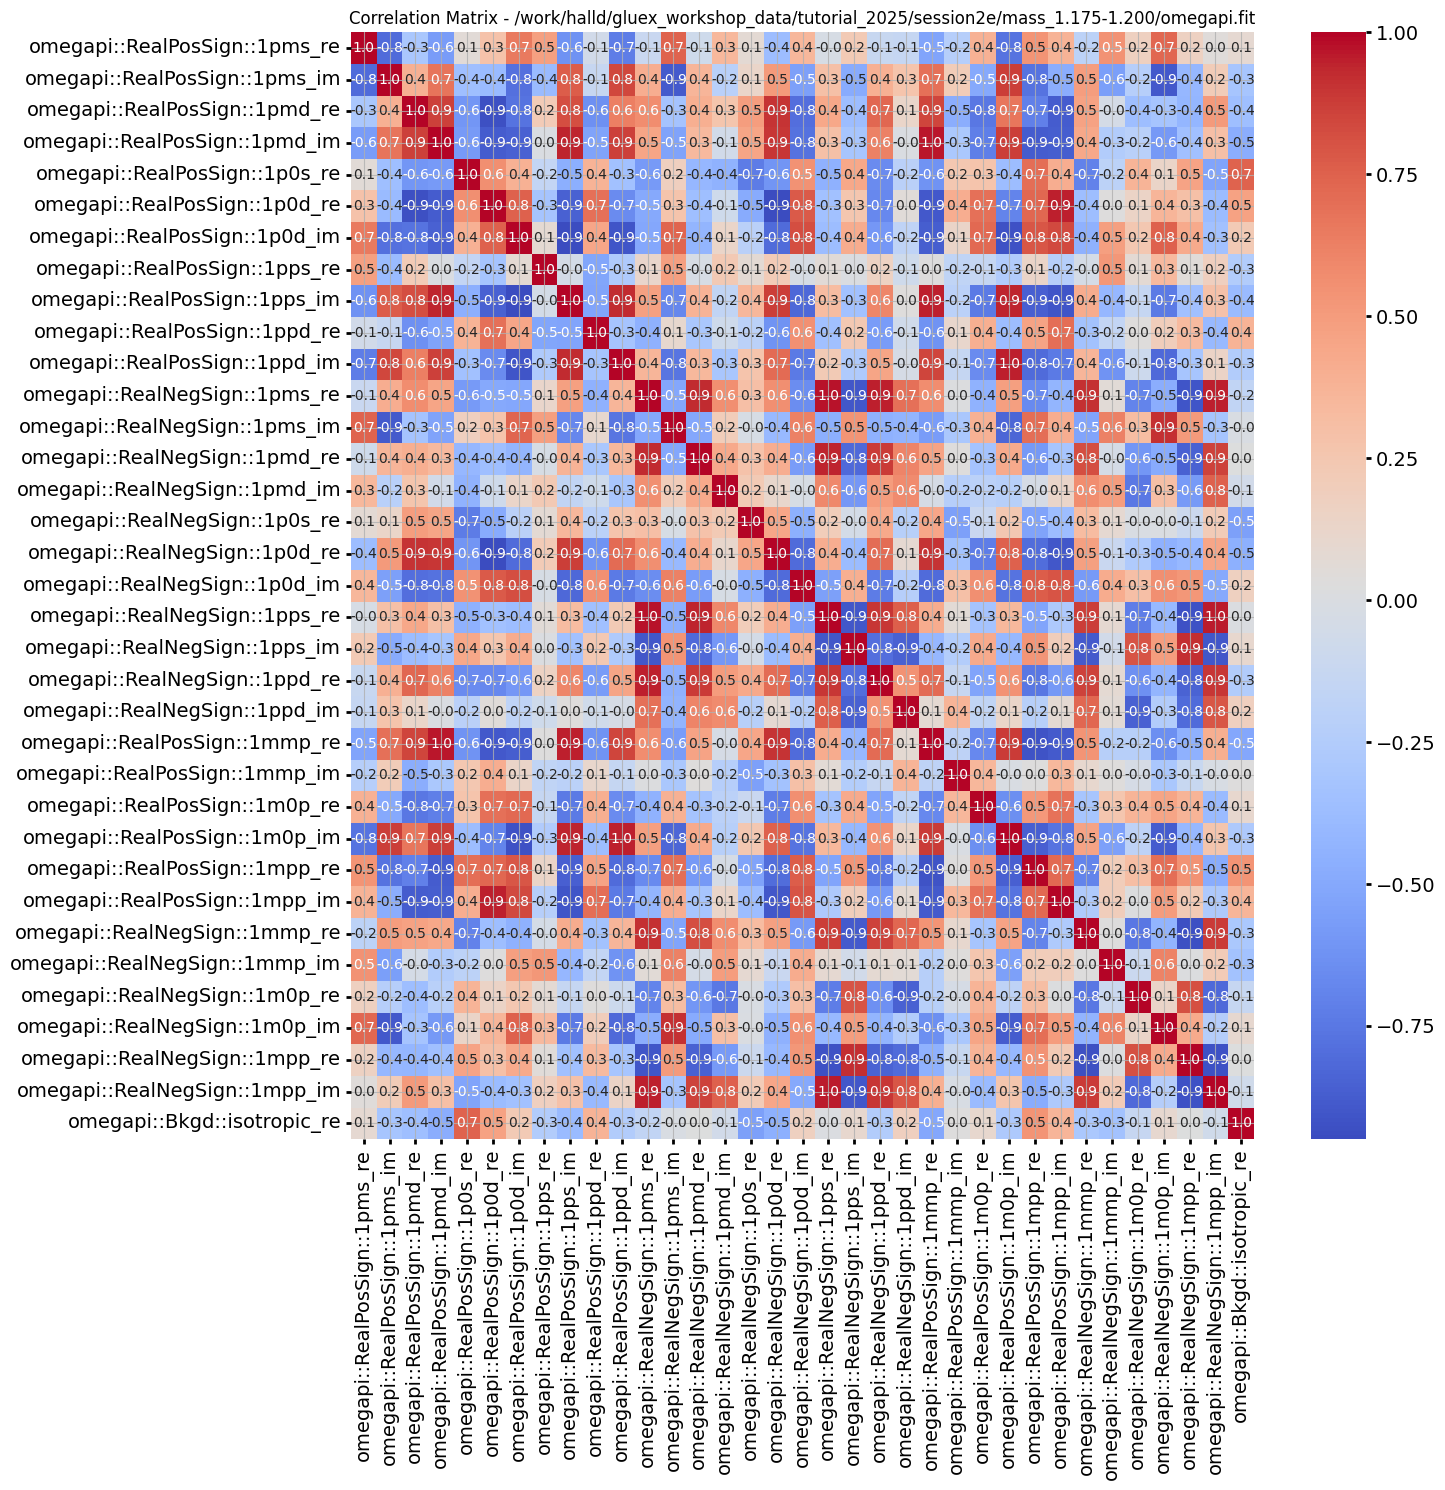

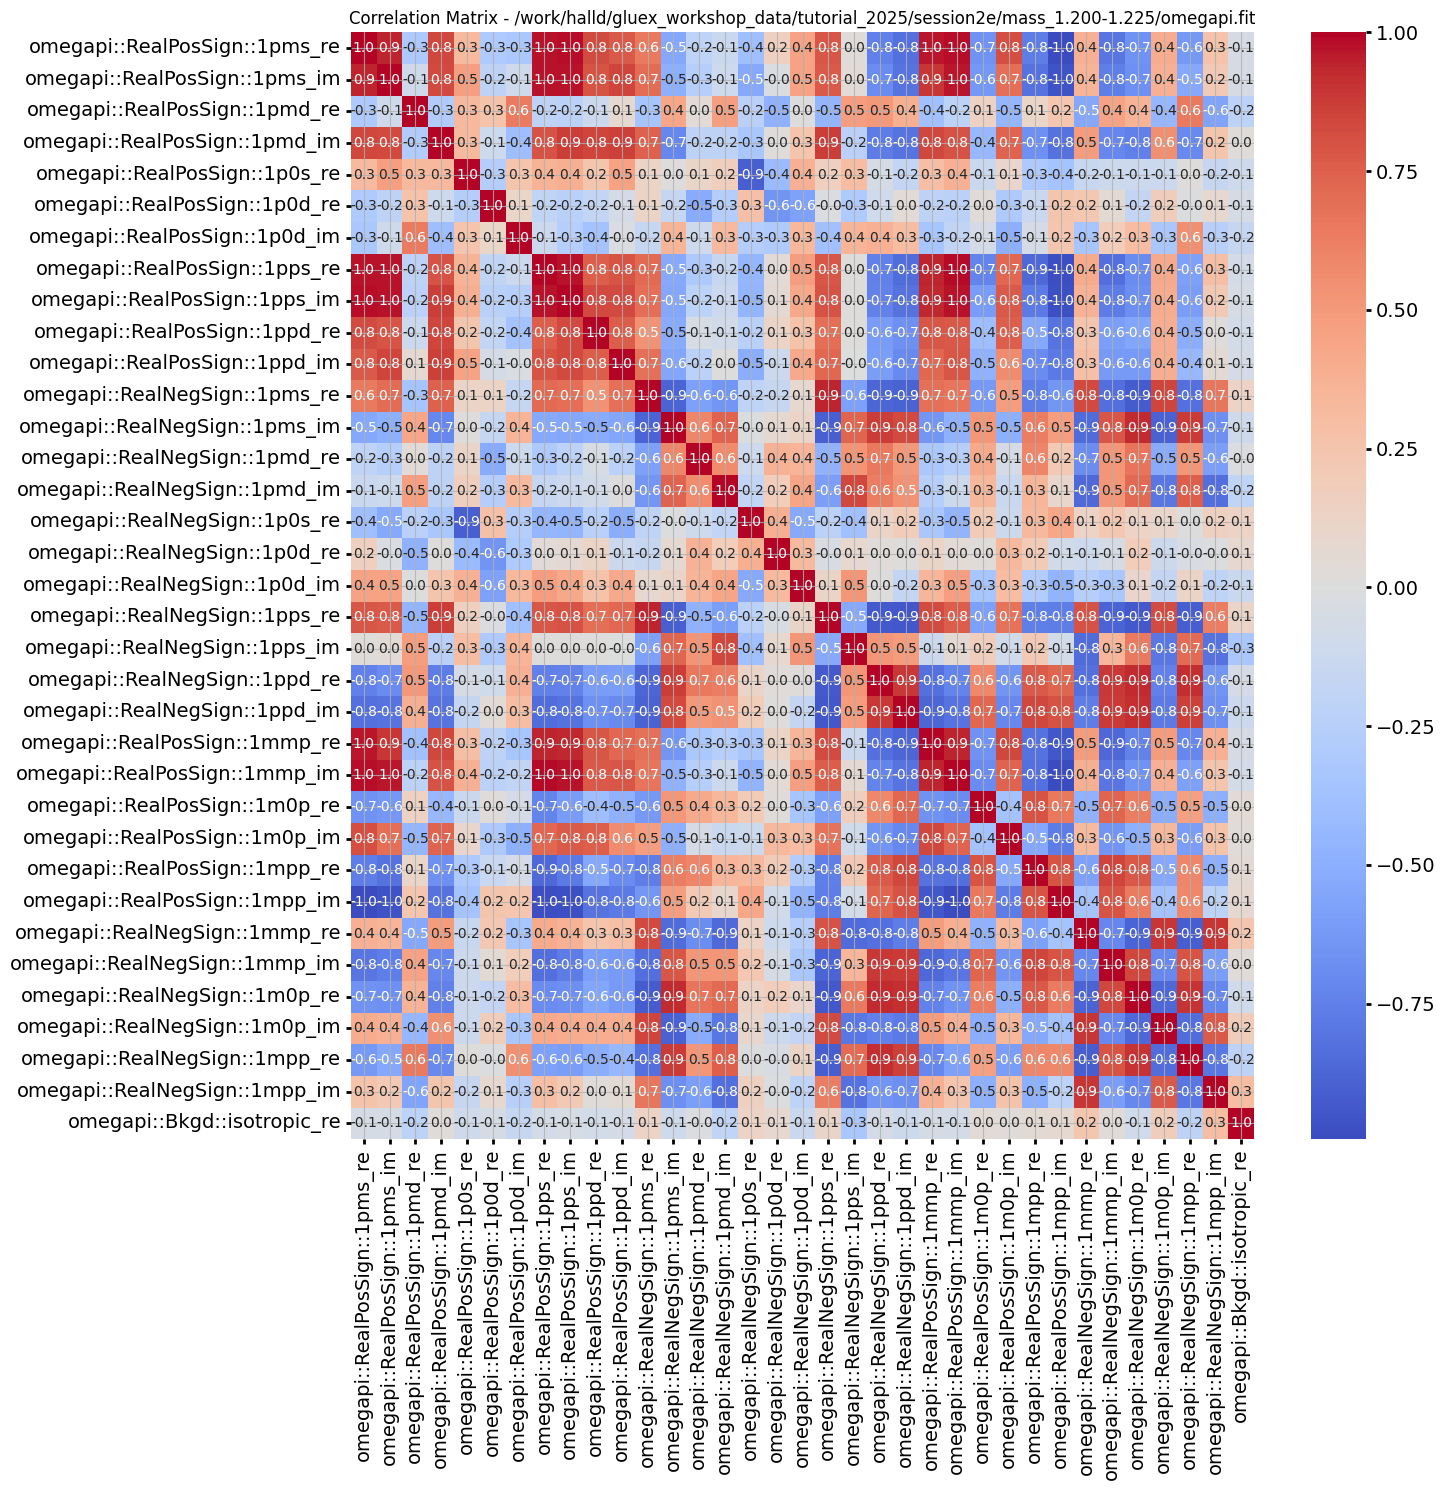

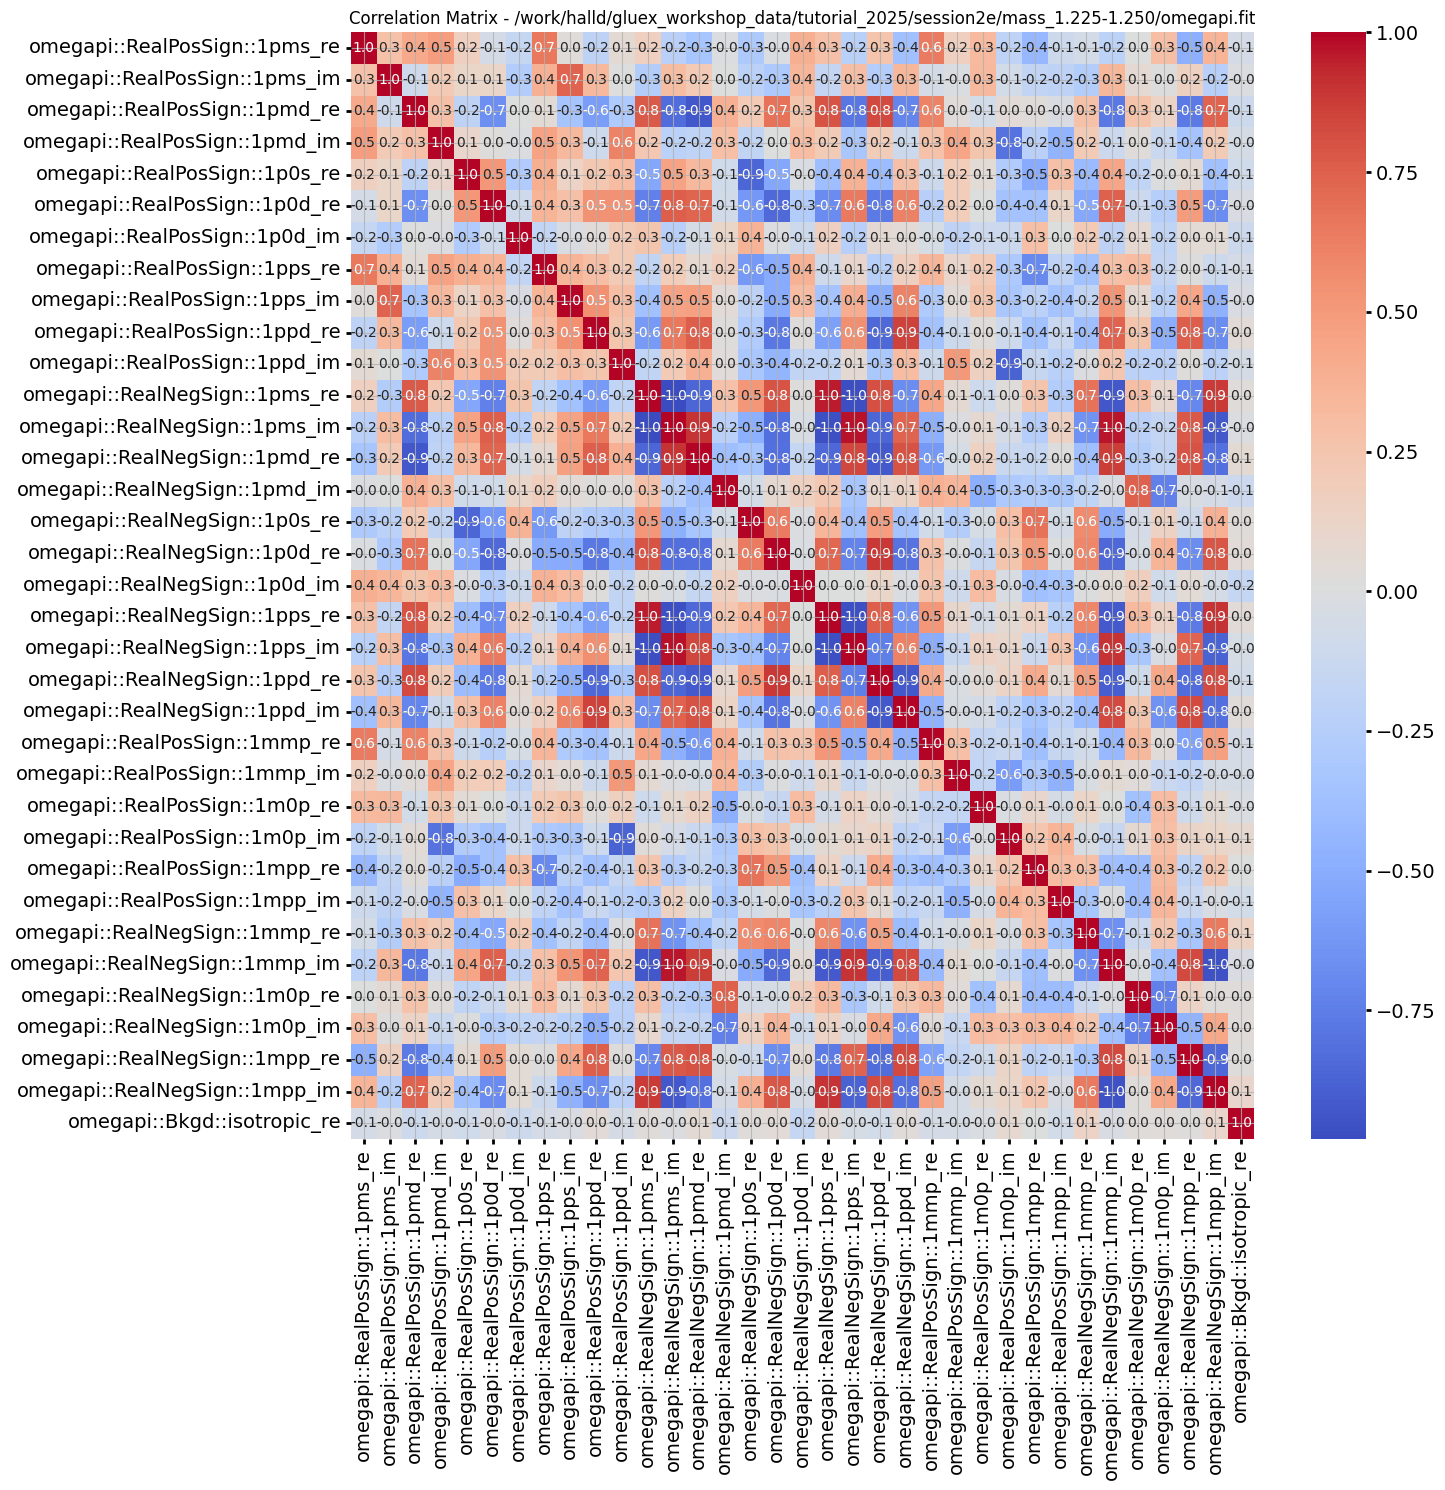

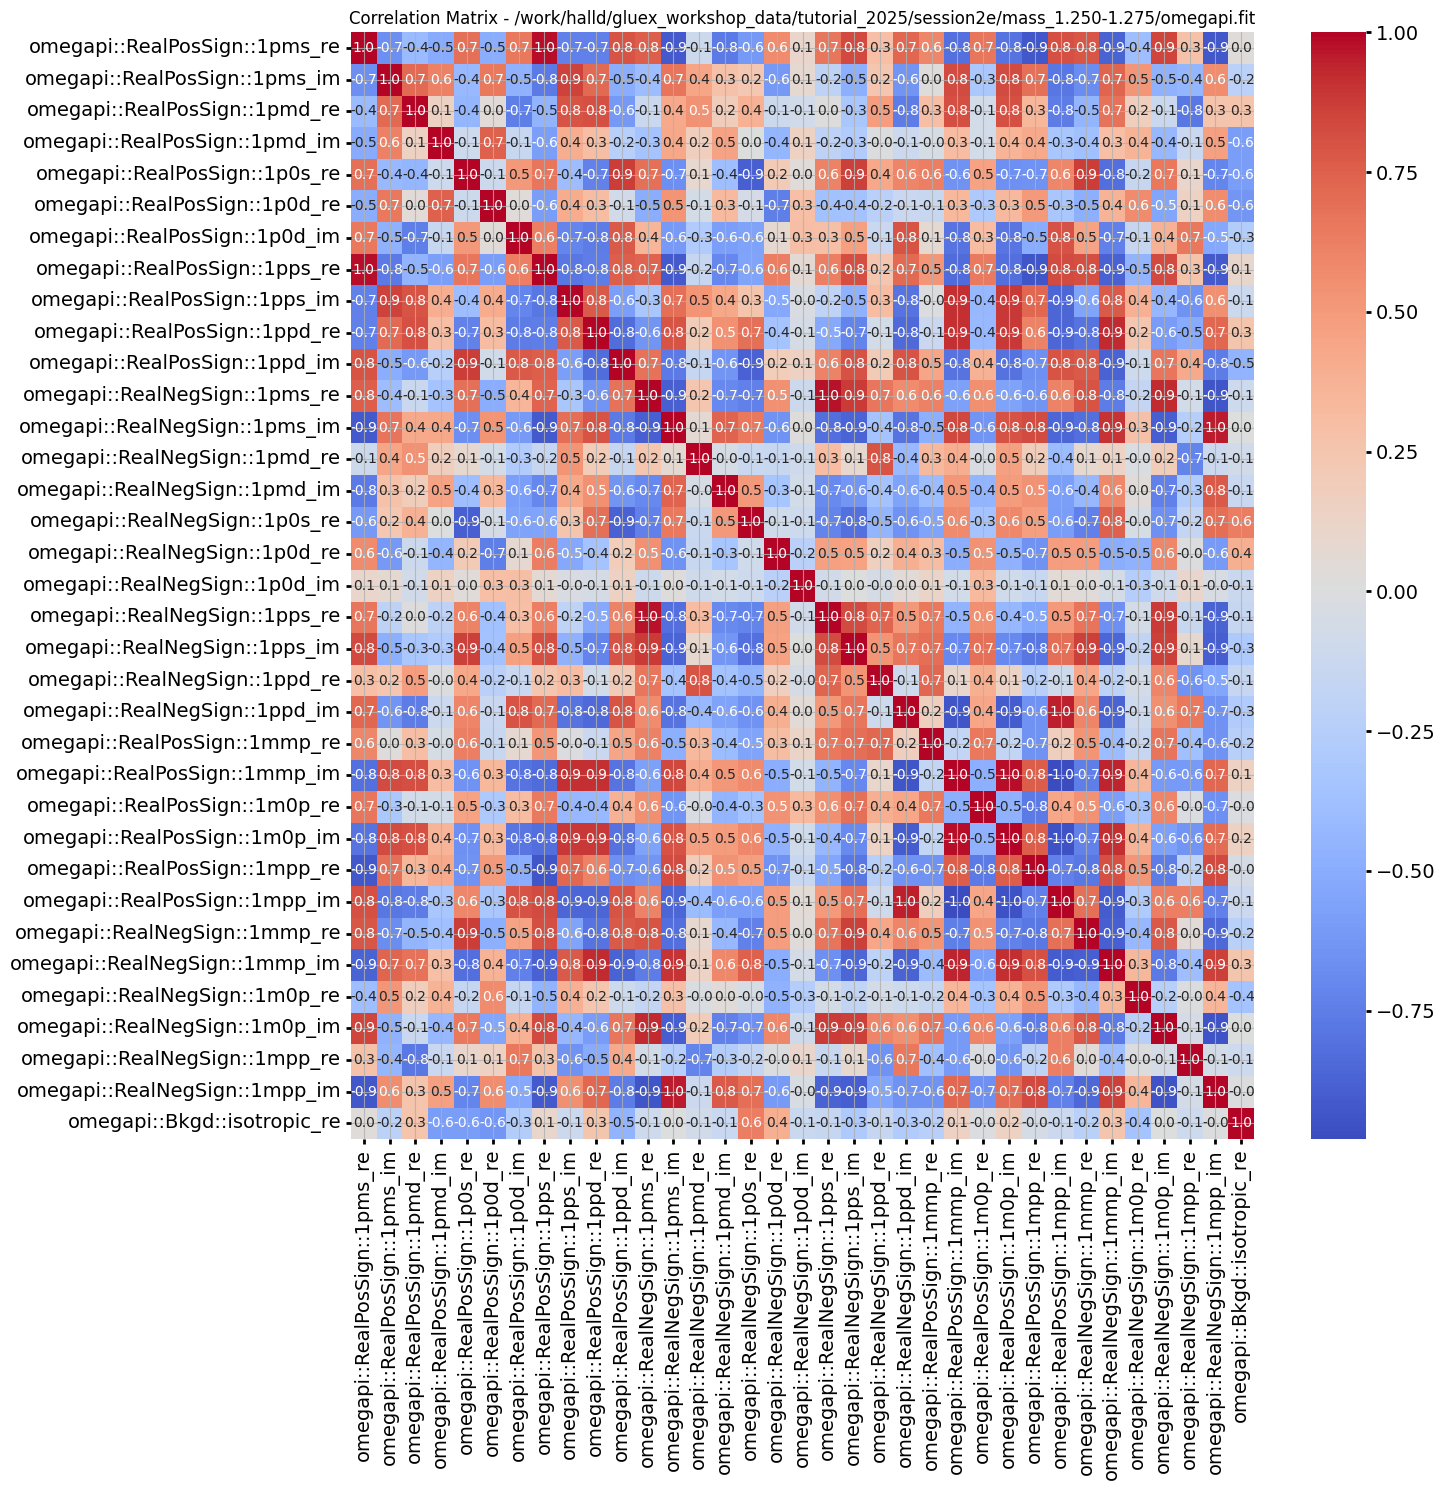

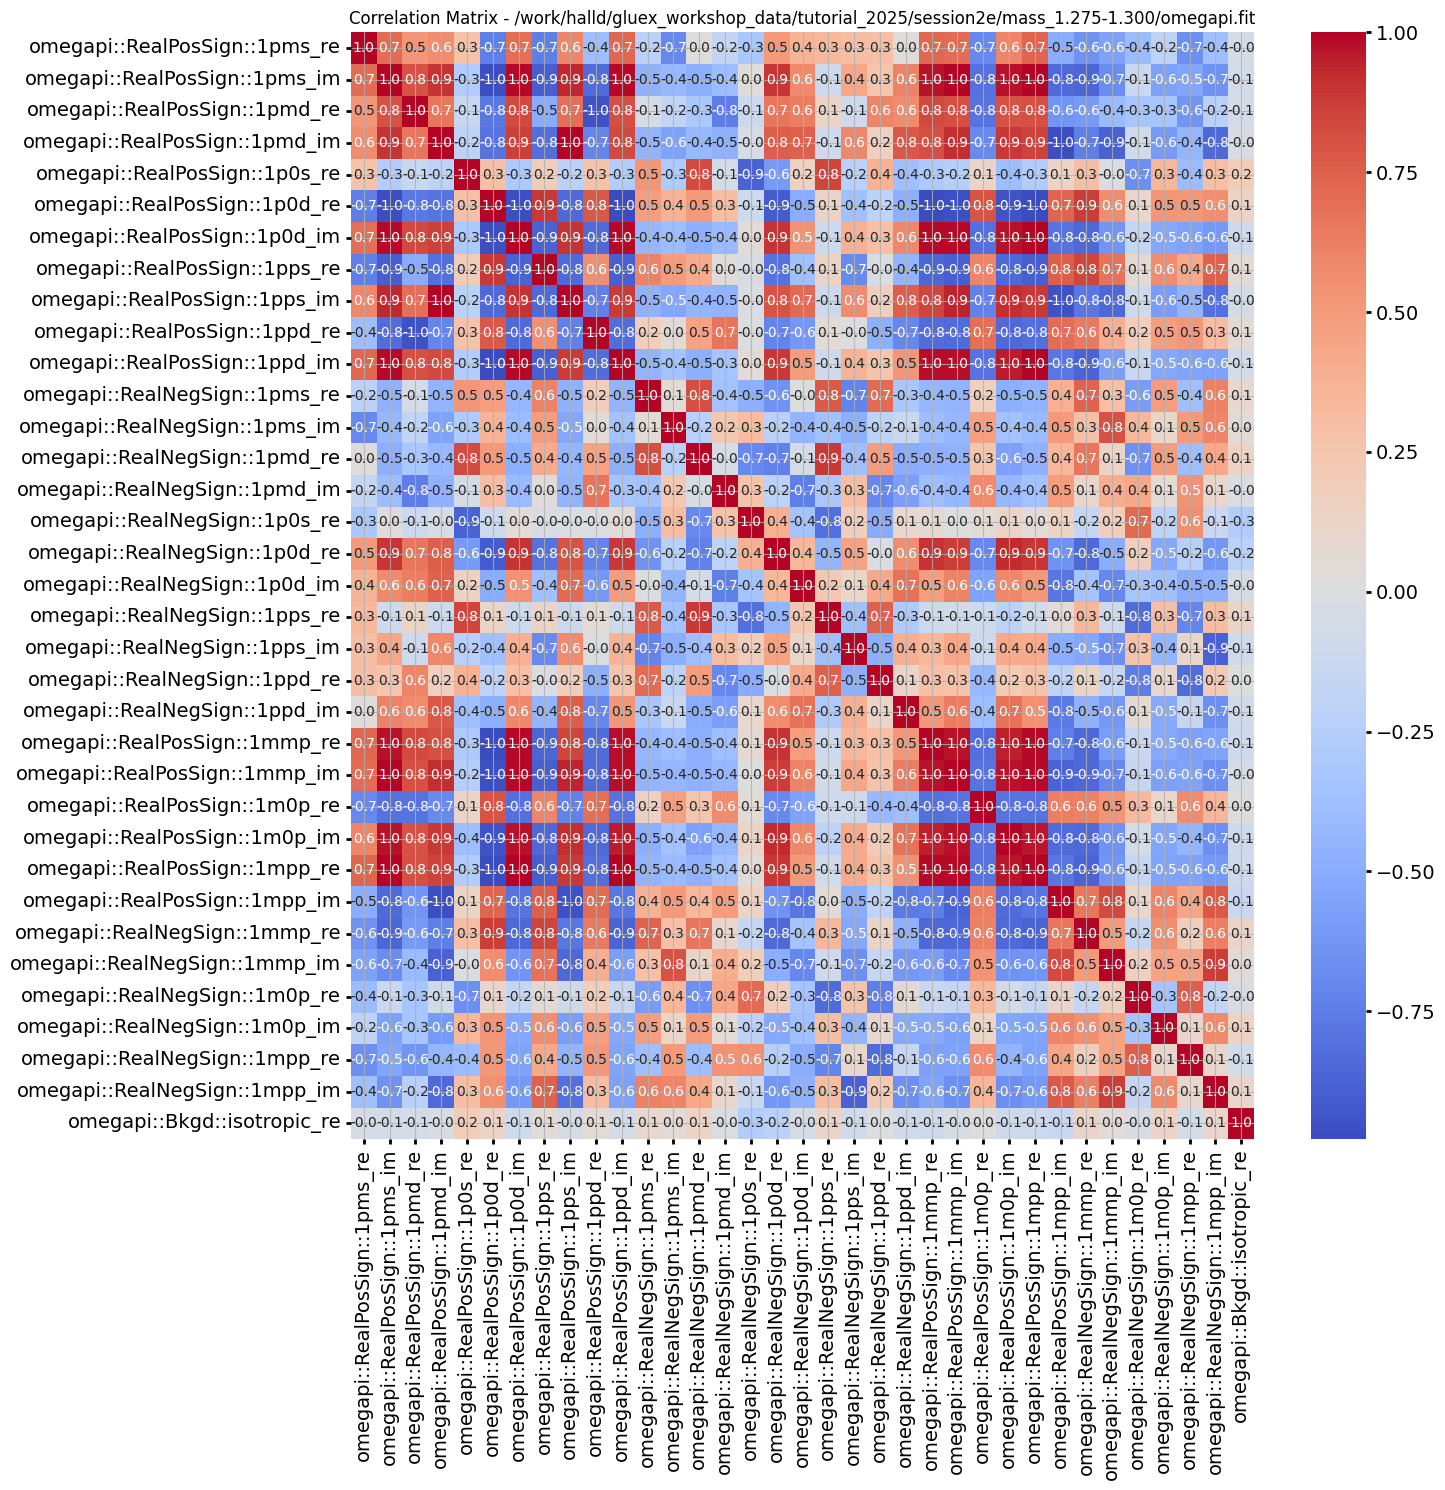

In [19]:
import seaborn as sns

df_corr = pd.read_csv("best_fits_corr.csv")
files = df_corr["file"].unique()
for file in files:    
    df_corr_file = df_corr[df_corr["file"] == file].copy()
    df_corr_file = df_corr_file.drop(columns=["file"])  # remove the file column

    # remove columns whose correlations are all zero
    df_corr_file = df_corr_file.loc[:, (df_corr_file != 0).any(axis=0)]

    df_corr_file = df_corr_file.set_index("parameter")
    
    plt.figure(figsize=(15, 15))
    sns.heatmap(df_corr_file.corr(), annot=True, fmt=".1f", cmap="coolwarm", cbar=True)
    plt.title(f"Correlation Matrix - {file}")
    plt.tight_layout()
    plt.show()